## torch 기본 사용법

In [2]:
import torch

In [3]:
#파이토치 숫자 선언
x = torch.tensor(3.5)
print(x)

tensor(3.5000)


In [4]:
#자동으로 기울기를 계산하기 위한 선언
x = torch.tensor(3.5,requires_grad=True)
print(x)

tensor(3.5000, requires_grad=True)


In [5]:
#자동으로 기울기를 계산하기 위한 선언
x = torch.tensor(3.5,requires_grad=True)
print(x)

#3차함수 선언 후, x에 3.5넣은 값을 찾고 싶다면?
y = (x-1) * (x-2) * (x-3)
print(y)

#기울기를 계산하고 싶다면?
y.backward()
x.grad

tensor(3.5000, requires_grad=True)
tensor(1.8750, grad_fn=<MulBackward0>)


tensor(5.7500)

In [6]:
#체인 룰
a = torch.tensor(2.0,requires_grad=True)
b = torch.tensor(1.0,requires_grad=True)

x = 2*a + 3*b
y = 5*a*a + 3*b*b*b
z = 2*x + 3*y

z.backward()
a.grad

tensor(64.)

## 보스톤 집값 선형회귀

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


boston = pd.read_csv('/Users/nam-yeong/Downloads/boston.csv')
df = pd.DataFrame(boston)

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

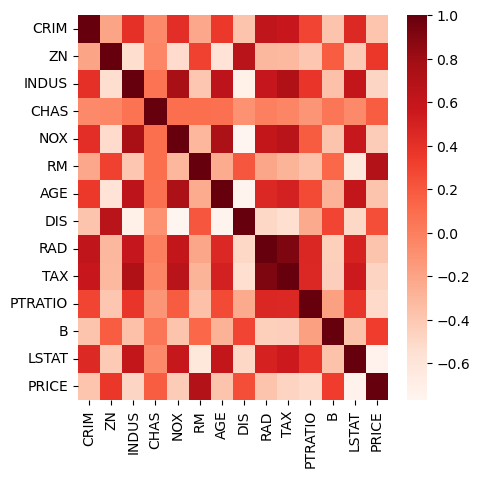

In [55]:
corr = df.corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr,cmap='Reds')
plt.show()

In [56]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [57]:
cols = ['PRICE','INDUS','RM','LSTAT','NOX','DIS']
data = torch.from_numpy(df[cols].values).float()

In [58]:
data

tensor([[24.0000,  2.3100,  6.5750,  4.9800,  0.5380,  4.0900],
        [21.6000,  7.0700,  6.4210,  9.1400,  0.4690,  4.9671],
        [34.7000,  7.0700,  7.1850,  4.0300,  0.4690,  4.9671],
        ...,
        [23.9000, 11.9300,  6.9760,  5.6400,  0.5730,  2.1675],
        [22.0000, 11.9300,  6.7940,  6.4800,  0.5730,  2.3889],
        [11.9000, 11.9300,  6.0300,  7.8800,  0.5730,  2.5050]])

In [59]:
X = data[:,1:]
y = data[:,:1]

print(X.shape, y.shape)

torch.Size([506, 5]) torch.Size([506, 1])


In [60]:
#hyperparameter
n_epochs = 2000
learning_rate = 1e-3
print_interval = 100

#model
model = nn.Linear(X.size(-1),y.size(-1))
print(model)

optimizer = optim.SGD(model.parameters(),lr=learning_rate)


Linear(in_features=5, out_features=1, bias=True)


In [61]:
for i in range(n_epochs):
    y_hat = model(X)
    loss = F.mse_loss(y_hat,y)
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    if (i+1) % print_interval == 0:
        print('Epoch %d: loss=%.4e' % (i+1, loss))

Epoch 100: loss=4.4658e+01
Epoch 200: loss=3.7761e+01
Epoch 300: loss=3.3936e+01
Epoch 400: loss=3.1780e+01
Epoch 500: loss=3.0565e+01
Epoch 600: loss=2.9880e+01
Epoch 700: loss=2.9493e+01
Epoch 800: loss=2.9275e+01
Epoch 900: loss=2.9152e+01
Epoch 1000: loss=2.9082e+01
Epoch 1100: loss=2.9043e+01
Epoch 1200: loss=2.9020e+01
Epoch 1300: loss=2.9007e+01
Epoch 1400: loss=2.8999e+01
Epoch 1500: loss=2.8995e+01
Epoch 1600: loss=2.8992e+01
Epoch 1700: loss=2.8990e+01
Epoch 1800: loss=2.8988e+01
Epoch 1900: loss=2.8987e+01
Epoch 2000: loss=2.8986e+01


<Figure size 500x500 with 0 Axes>

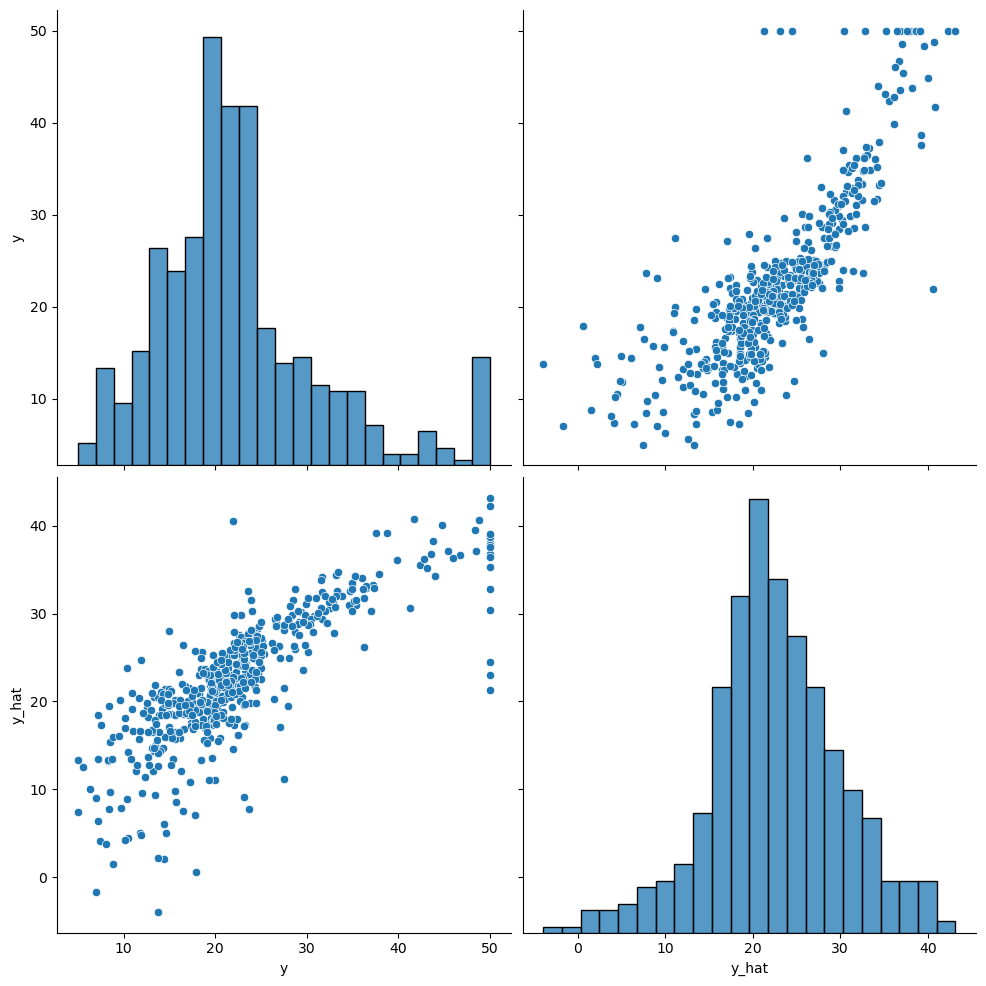

In [62]:
result = pd.DataFrame(torch.cat([y,y_hat],dim=1).detach_().numpy(),columns=['y','y_hat'])

plt.figure(figsize=(5,5))
sns.pairplot(result,height=5)
plt.show()

## 심장병 분류

In [65]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [72]:
df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
df['class'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [85]:
df[:-1]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,0


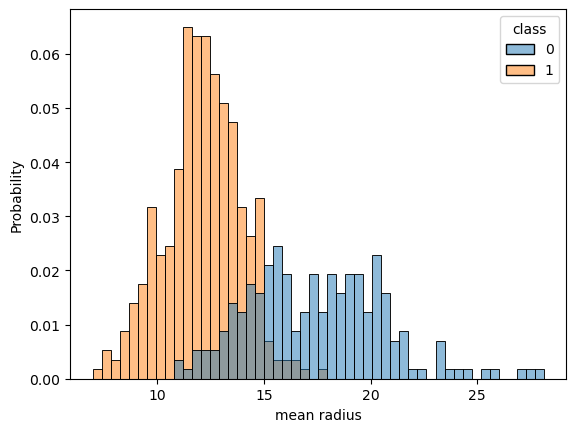

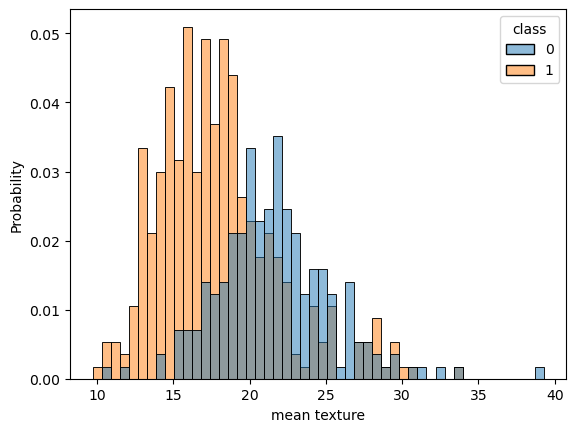

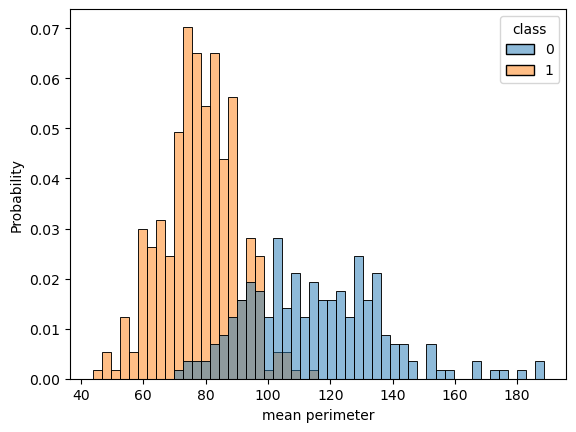

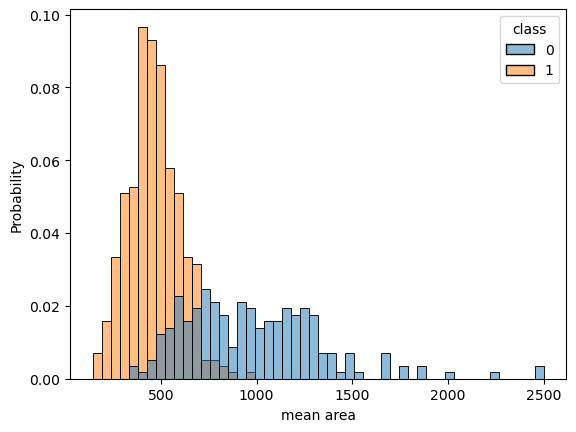

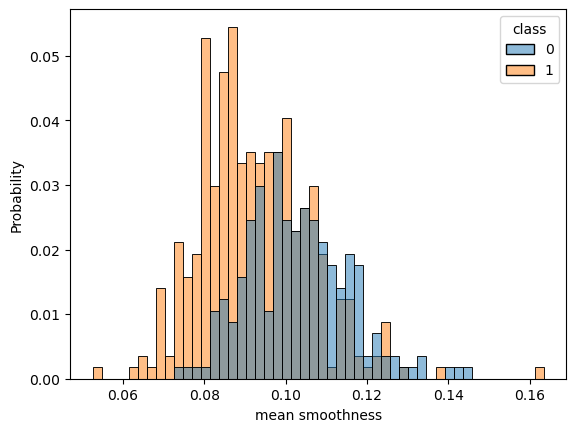

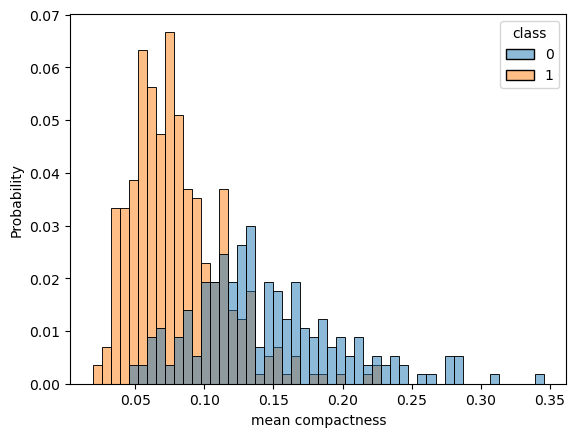

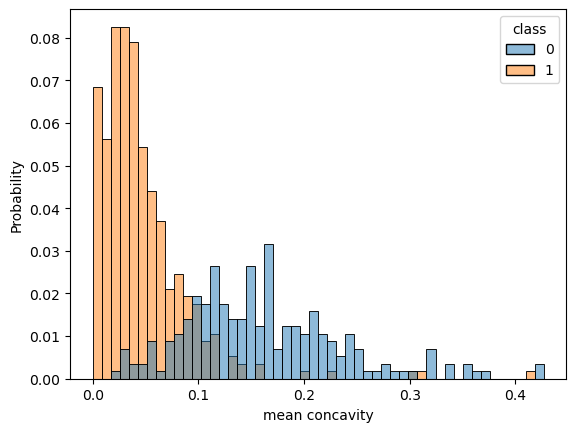

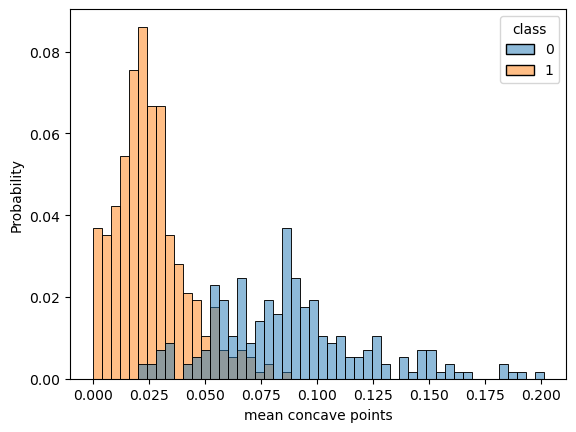

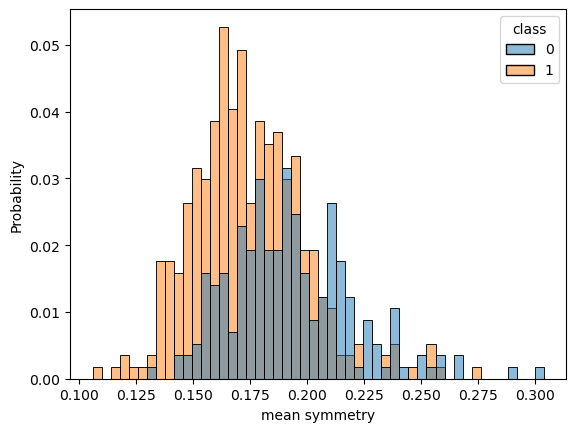

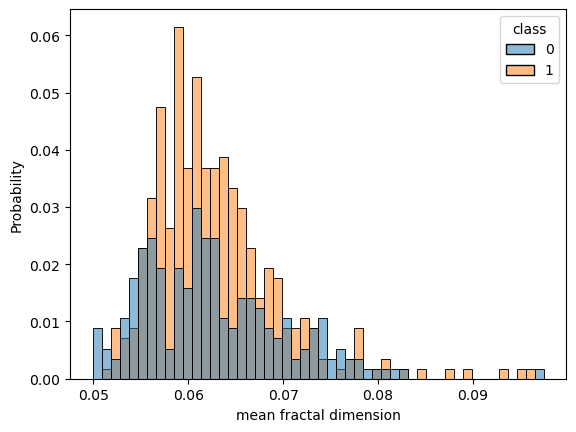

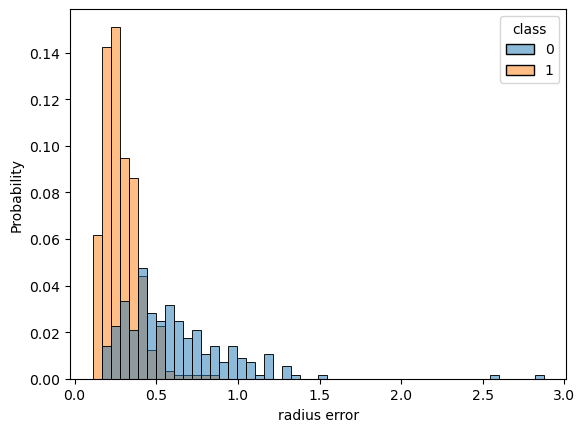

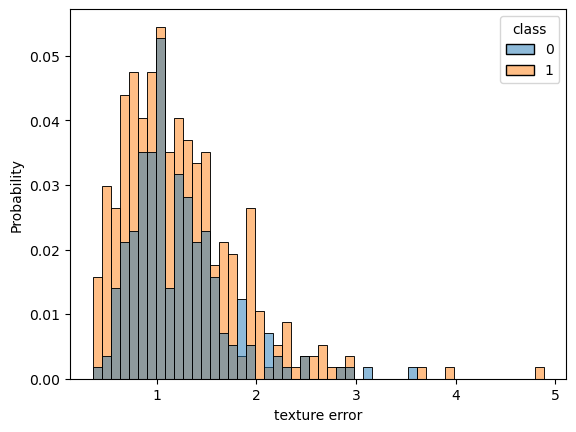

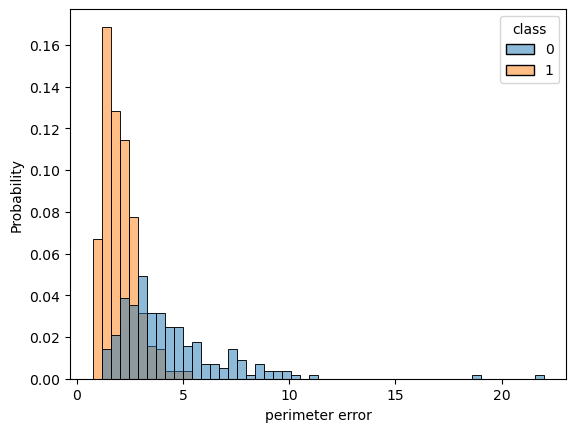

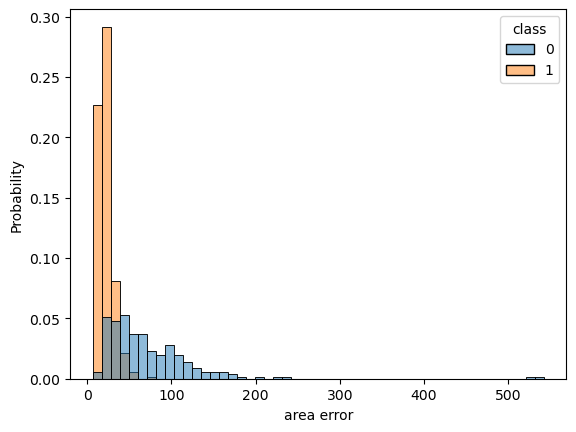

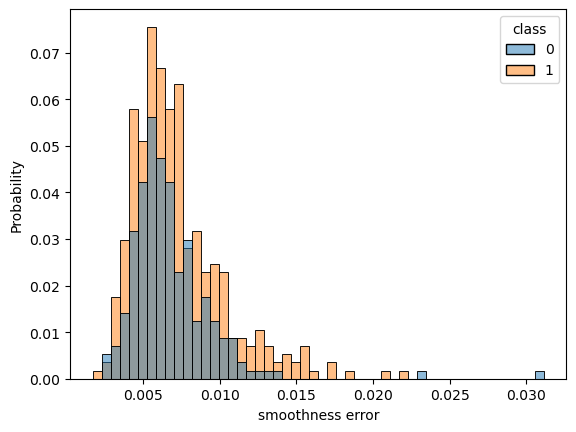

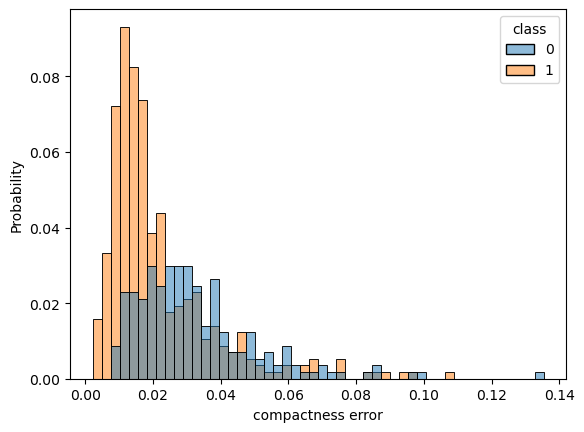

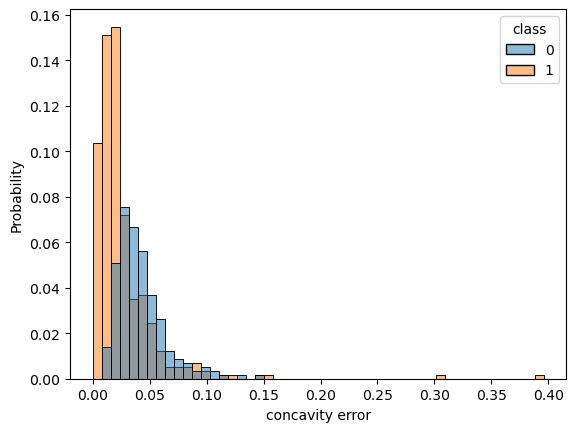

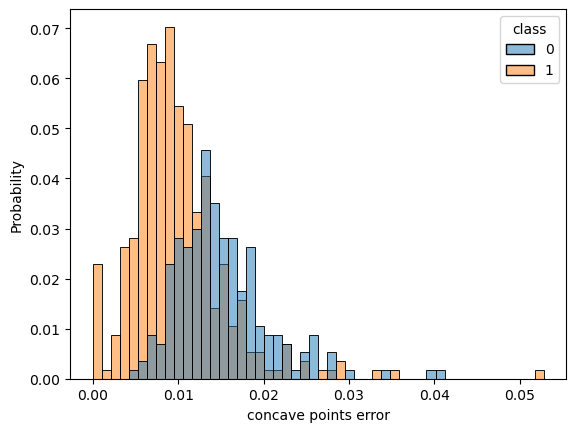

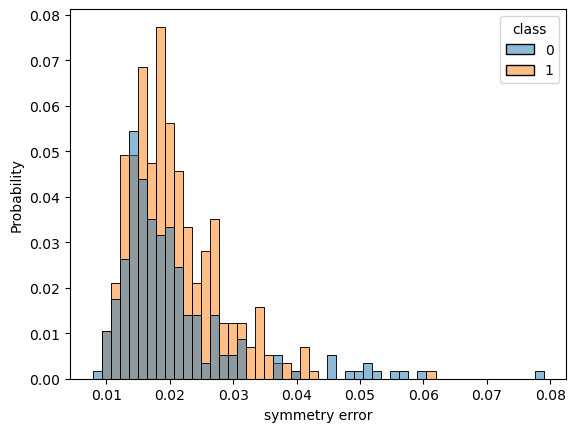

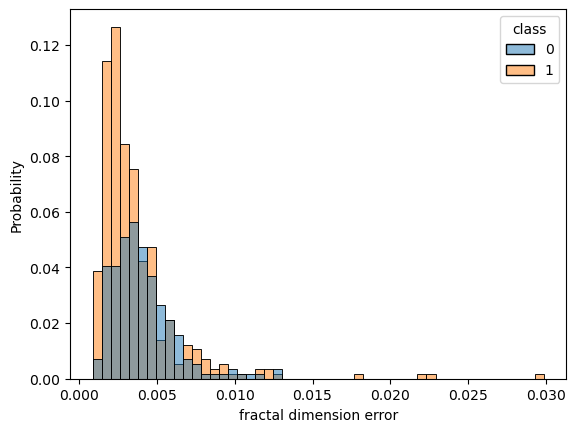

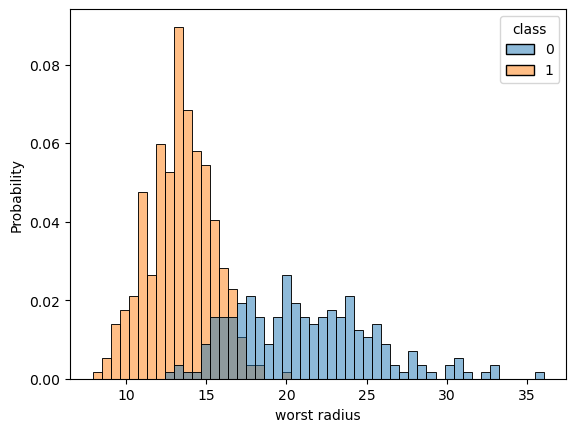

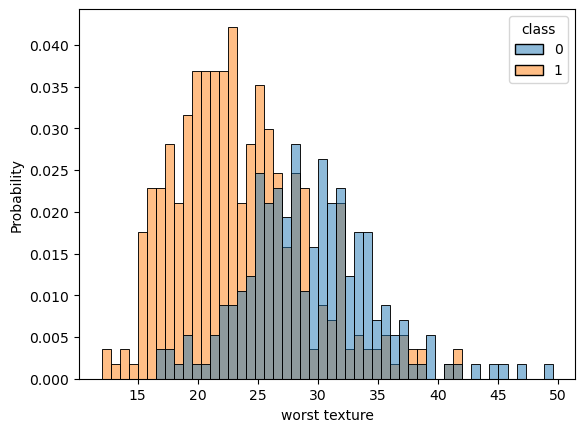

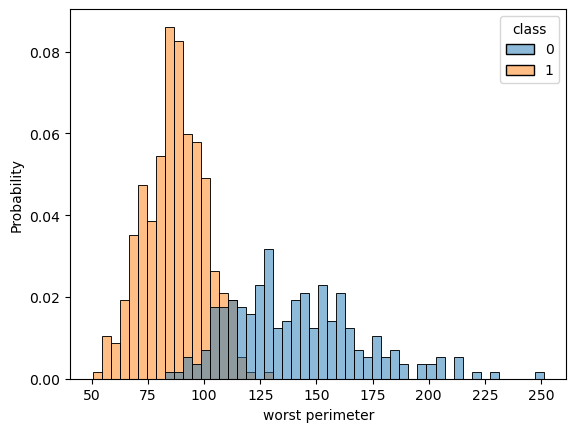

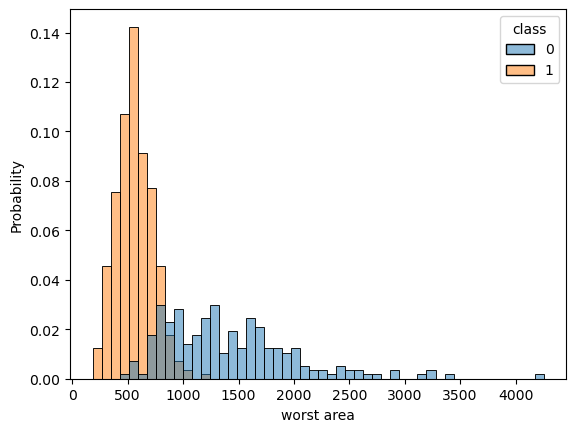

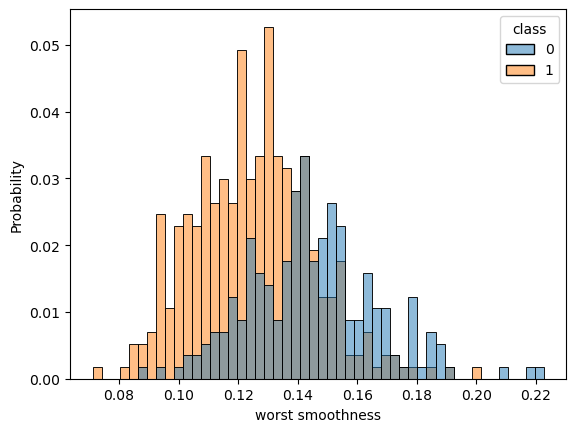

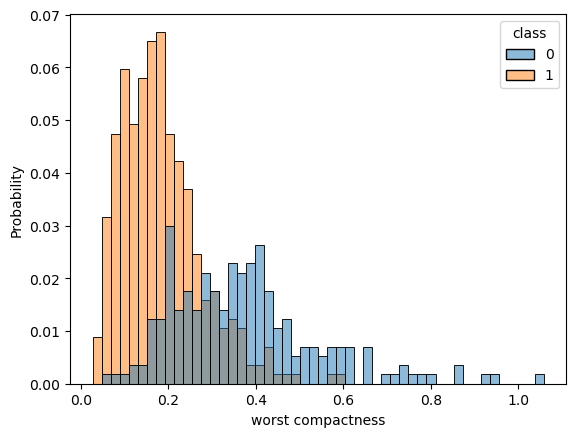

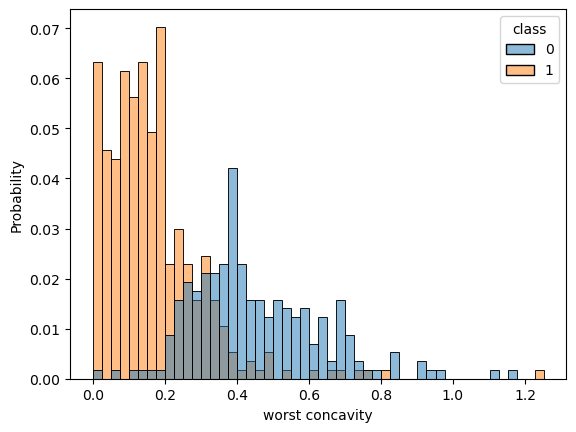

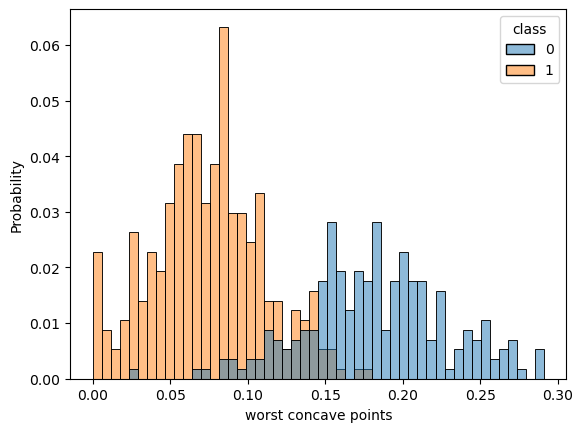

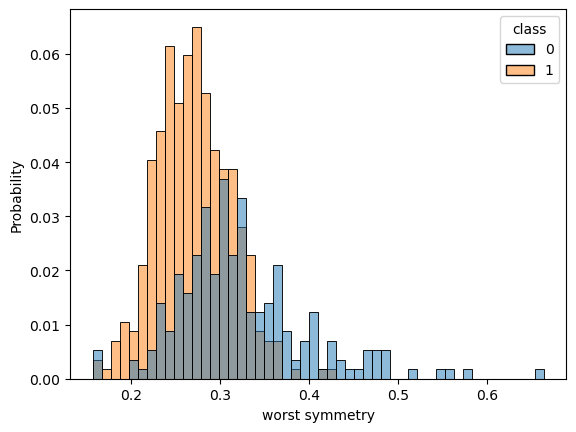

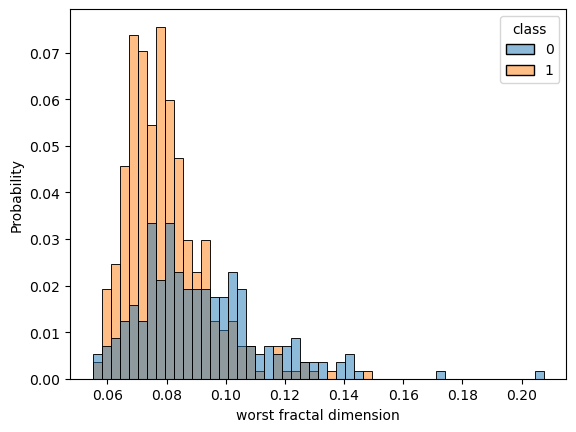

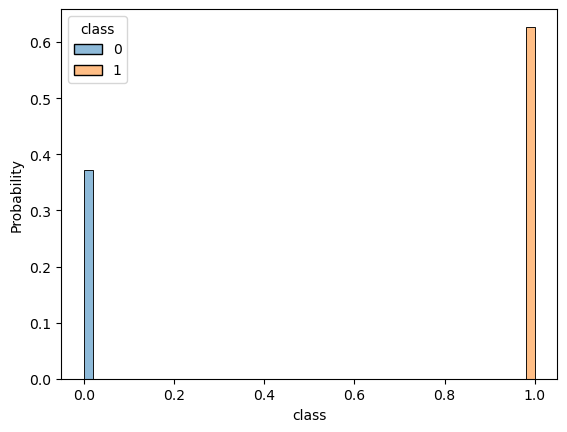

In [87]:
for col in df.columns:
    sns.histplot(df,x=col,hue=df['class'],bins=50,stat='probability')
    plt.show()

In [88]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

data = torch.from_numpy(df.values).float()
data.shape

torch.Size([569, 31])

In [102]:
df.columns
cols = ['mean radius', 'mean texture',
       'mean smoothness', 'mean compactness',
       'mean concave points',
       'worst radius', 'worst texture',
       'worst smoothness', 'worst compactness',
       'worst concave points',
       'class']

In [103]:
data = torch.from_numpy(df[cols].values).float()
data.shape

torch.Size([569, 11])

In [104]:
X = data[:,:-1]
y = data[:,-1:]
X.shape,y.shape

(torch.Size([569, 10]), torch.Size([569, 1]))

In [105]:
n_epochs=200000
learning_rate=1e-2
print_interval=10000

In [106]:
class MyModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        super().__init__()
        
        self.linear = nn.Linear(input_dim,output_dim)
        self.act = nn.Sigmoid()
    
    def forward(self,x):
        y = self.act(self.linear(x))
        
        return y

In [107]:
X.size(-1)

10

In [108]:
model = MyModel(input_dim=X.size(-1),output_dim=y.size(-1))
crit = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=learning_rate)

In [109]:
for i in range(n_epochs):
    y_hat = model(X)
    loss = crit(y_hat,y)
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    if (i+1) % print_interval == 0:
        print('epoch : %d: loss : %.4e'%(i+1, loss))

epoch : 10000: loss : 2.7535e-01
epoch : 20000: loss : 2.2749e-01
epoch : 30000: loss : 1.9884e-01
epoch : 40000: loss : 1.8011e-01
epoch : 50000: loss : 1.6700e-01
epoch : 60000: loss : 1.5733e-01
epoch : 70000: loss : 1.4991e-01
epoch : 80000: loss : 1.4404e-01
epoch : 90000: loss : 1.3926e-01
epoch : 100000: loss : 1.3530e-01
epoch : 110000: loss : 1.3196e-01
epoch : 120000: loss : 1.2911e-01
epoch : 130000: loss : 1.2663e-01
epoch : 140000: loss : 1.2446e-01
epoch : 150000: loss : 1.2255e-01
epoch : 160000: loss : 1.2085e-01
epoch : 170000: loss : 1.1932e-01
epoch : 180000: loss : 1.1794e-01
epoch : 190000: loss : 1.1669e-01
epoch : 200000: loss : 1.1554e-01


In [113]:
y.size()

torch.Size([569, 1])

In [110]:
correct_cnt = (y==(y_hat>0.5)).sum()
total_cnt = float(y.size(0))

print('Accuracy : %.4f' % (correct_cnt/total_cnt))

Accuracy : 0.9649


<Axes: xlabel='y_hat', ylabel='Probability'>

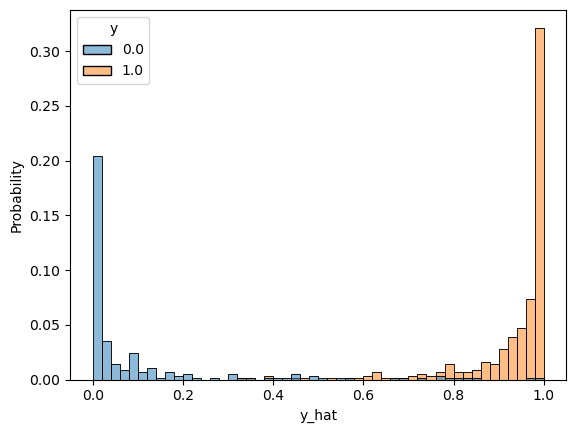

In [115]:
df = pd.DataFrame(torch.cat([y,y_hat],dim=1).detach().numpy(),columns=['y','y_hat'])
sns.histplot(df,x='y_hat',hue='y',bins=50,stat='probability')